In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## Step 1: Problem Statement

## Step 2: Data Gathering

In [23]:
df_water = pd.read_csv(r"D:\Jupyter python\My Python\CodeSoft\IRIS.csv")
df_water

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Step 3: EDA

In [24]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df_water.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
df_water.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [27]:
df_water.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### To find outliers

<Axes: >

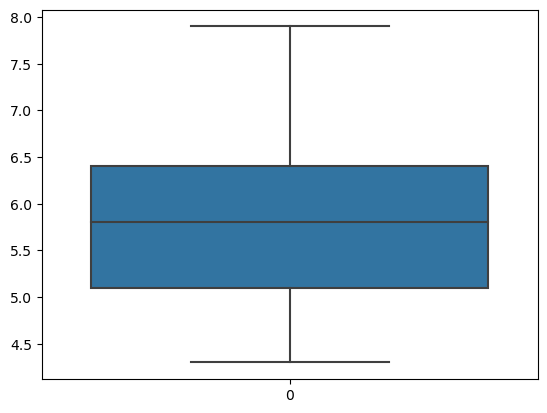

In [28]:
sns.boxplot(df_water["sepal_length"])

## Step 4 : Feature Engineering

In [29]:
Q1 = df_water.quantile(0.25)
Q3 = df_water.quantile(0.75)
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

outliers = (df_water < lower_tail) | (df_water > upper_tail)
outlier_counts = outliers.sum()
outlier_counts

petal_length    0
petal_width     0
sepal_length    0
sepal_width     4
species         0
dtype: int64

In [30]:
def Finding_outliar1(df_water,columns):
    for column in columns:
            q1 = df_water[column].quantile(0.25)
            q3 = df_water[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df_water[column] = df_water[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["sepal_width"]
Finding_outliar1(df_water,columns)

2.05
4.05


In [31]:
L = LabelEncoder()
df_water["species"]= L.fit_transform(df_water["species"])

## Step 5 : Feature Selection

In [32]:
df_water.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.110343,0.871754,0.817954,0.782561
sepal_width,-0.110343,1.000000,-0.419823,-0.355582,-0.419264
petal_length,0.871754,-0.419823,1.000000,0.962757,0.949043
petal_width,0.817954,-0.355582,0.962757,1.000000,0.956464
species,0.782561,-0.419264,0.949043,0.956464,1.000000


<Axes: >

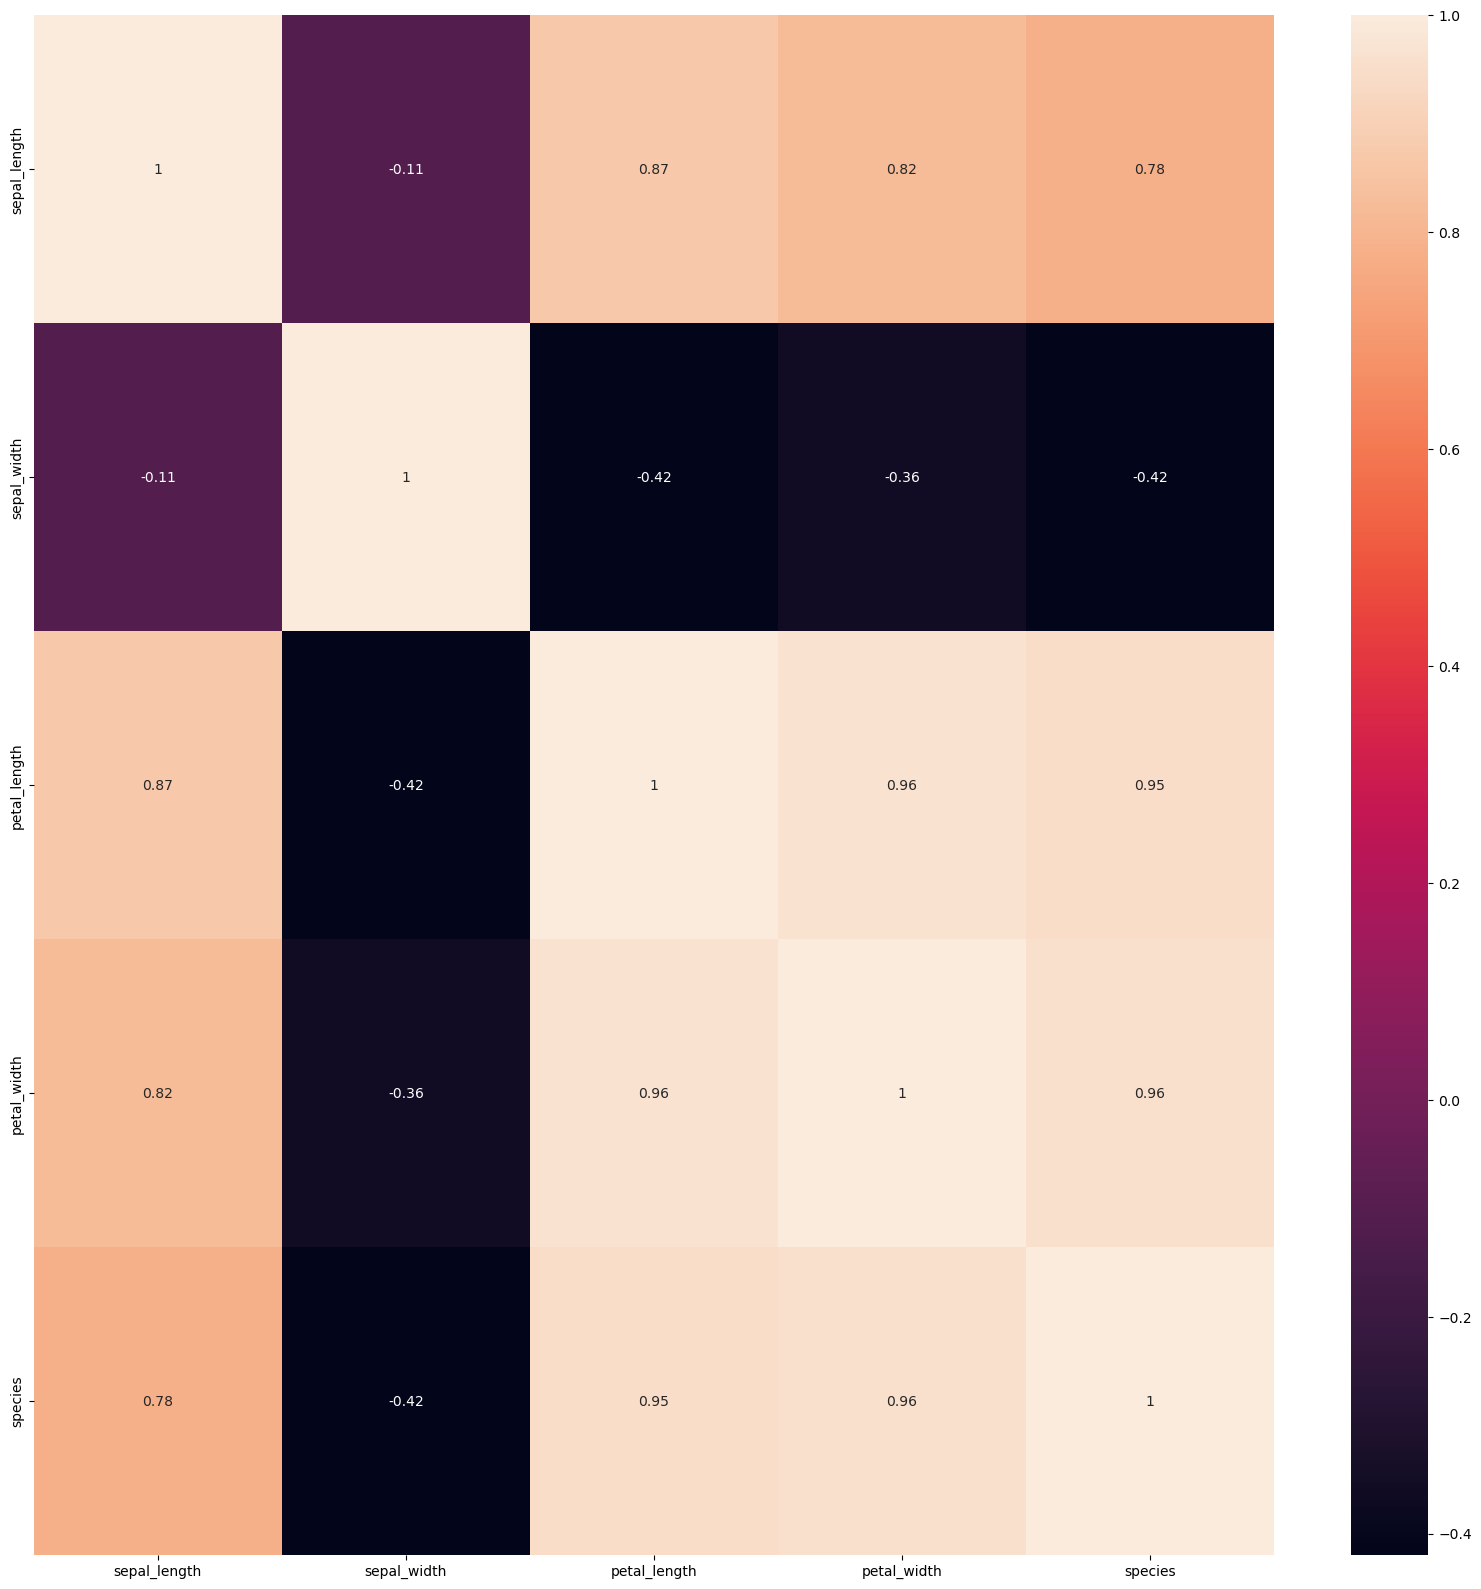

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df_water.corr(),annot= True)

In [36]:
x = df_water.iloc[:,:3]
y = df_water["species"]
x

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


## Step 6 : model training

<Axes: xlabel='species', ylabel='count'>

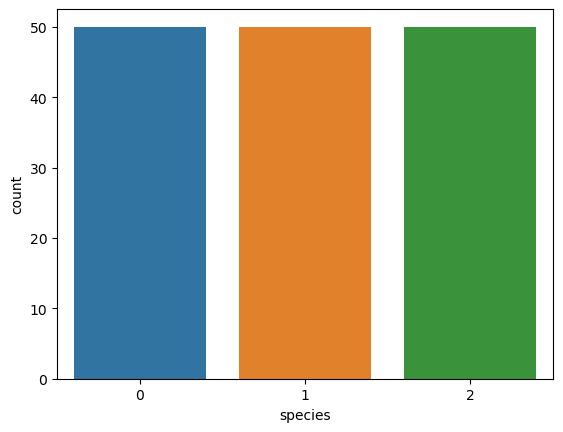

In [48]:
sns.countplot(x=df_water["species"])

In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

###  LogisticRegression

In [71]:
log1 = LogisticRegression()  

In [72]:
log_model1 = log1.fit(xtrain,ytrain)
log_model1

LogisticRegression()

In [73]:
ytrain_pred = log_model1.predict(xtrain)
ytrain_pred

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

### Training

In [74]:
accuracy = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {accuracy}")
 
Training_confusion_matrix = confusion_matrix(ytrain,ytrain_pred)
print(Training_confusion_matrix)
 

class_report = classification_report(ytrain,ytrain_pred)
print(class_report)

Accuracy : 0.9619047619047619
[[34  0  0]
 [ 0 29  3]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.91      0.94        32
           2       0.93      0.97      0.95        39

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



### Testing

In [75]:
ytest_pred = log_model1.predict(xtest)
ytest_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [76]:
accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {accuracy}")
 
Testing_confusion_matrix = confusion_matrix(ytest,ytest_pred)
print(Testing_confusion_matrix)
 

class_report = classification_report(ytest,ytest_pred)
print(class_report)

Accuracy : 0.9555555555555556
[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



## DecisionTreeClassifier

In [77]:
x1train,x1test,y1train,y1test=train_test_split(x,y,test_size=0.3,random_state=10)

In [78]:
dec_tree = DecisionTreeClassifier()
dec_tree_model = dec_tree.fit(x1train,y1train)
dec_tree_model

DecisionTreeClassifier()

### Training

In [79]:
y1train_pred = dec_tree_model.predict(x1train)
y1train_pred

array([0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2,
       0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [80]:
accuracy = accuracy_score(y1train,y1train_pred)
print(f"Accuracy = {accuracy}")

Training_classification_report = classification_report(y1train,y1train_pred)
print(f"classification_report = {Training_classification_report}")

Training_confusion_matrix = confusion_matrix(y1train,y1train_pred)
print(f"confusion_matrix = {Training_confusion_matrix}")

Accuracy = 1.0
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

confusion_matrix = [[36  0  0]
 [ 0 33  0]
 [ 0  0 36]]


### Testing

In [81]:
y1test_pred = dec_tree_model.predict(x1test)
y1test_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 1, 0,
       1])

In [82]:
accuracy = accuracy_score(y1test,y1test_pred)
print(f"Accuracy = {accuracy}")

Testing_classification_report = classification_report(y1test,y1test_pred)
print(f"classification_report = {Testing_classification_report}")

Testing_confusion_matrix = confusion_matrix(y1test,y1test_pred)
print(f"confusion_matrix = {Testing_confusion_matrix}")

Accuracy = 0.9555555555555556
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

confusion_matrix = [[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]


## Hyperparameter Tunning

In [83]:
hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(2,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,20),
} 

In [84]:
gridsearch = GridSearchCV(dec_tree_model,hyperparameters,cv=5)

In [85]:
gridsearch.fit(x1train,y1train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [86]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [87]:
hyper_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [88]:
hyper_model.fit(x1train,y1train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

### Training

In [89]:
y1train_pred_hyper = hyper_model.predict(x1train)
y1train_pred_hyper

array([0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [90]:
accuracy = accuracy_score(y1train,y1train_pred_hyper)
print(f"Accuracy = {accuracy}")

Training_classification_report_hyper = classification_report(y1train,y1train_pred_hyper)
print(f"classification_report = {Training_classification_report_hyper}")

Training_confusion_matrix = confusion_matrix(y1train,y1train_pred_hyper)
print(f"confusion_matrix = {Training_confusion_matrix}")

Accuracy = 0.9714285714285714
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.94      0.95        33
           2       0.95      0.97      0.96        36

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

confusion_matrix = [[36  0  0]
 [ 0 31  2]
 [ 0  1 35]]


### Testing

In [91]:
y1test_pred_hyper = hyper_model.predict(x1test)
y1test_pred_hyper

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 1, 0,
       1])

In [92]:
accuracy = accuracy_score(y1test,y1test_pred_hyper)
print(f"Accuracy = {accuracy}")

Testing_classification_report = classification_report(y1test,y1test_pred_hyper)
print(f"classification_report = {Testing_classification_report}")

Testing_confusion_matrix = confusion_matrix(y1test,y1test_pred_hyper)
print(f"confusion_matrix = {Testing_confusion_matrix}")

Accuracy = 0.9555555555555556
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

confusion_matrix = [[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]
